In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from tb_model import TB300
from ssd_utils import PriorUtil
from ssd_data import preprocess
from utils.model import load_weights

Using TensorFlow backend.


In [2]:
model = TB300()
prior_util = PriorUtil(model)

In [3]:
for l in model.layers:
    #print('%-28s %-18s %s' % (l.name, l.__class__.__name__, l.output_shape))
    pass

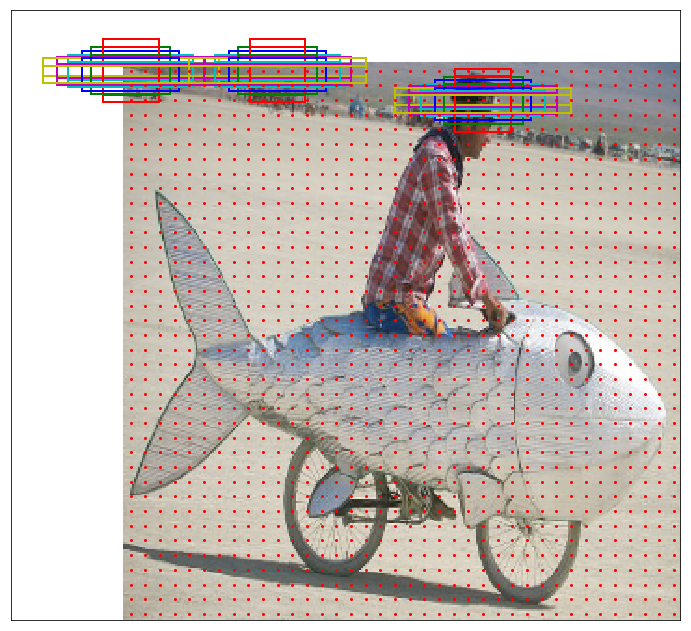

source_layer_name        conv4_3
map_size                 (38, 38)
aspect_ratios            [1, 2, 3, 5, 7, 10, 1, 2, 3, 5, 7, 10]
shift                    [(0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5)]
clip                     False
flip                     False
minmax_size              [30. 75.]
special_ssd_box          False
num_locations            1444
num_boxes                17328
num_boxes_per_location   12



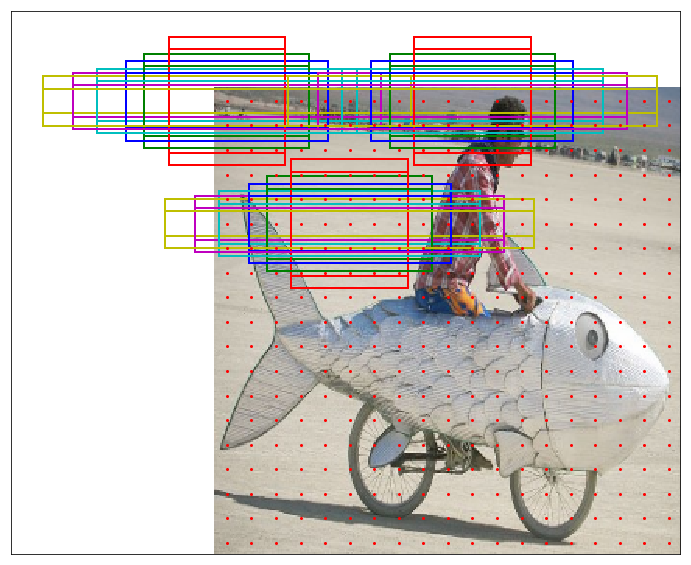

source_layer_name        fc7
map_size                 (19, 19)
aspect_ratios            [1, 2, 3, 5, 7, 10, 1, 2, 3, 5, 7, 10]
shift                    [(0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5)]
clip                     False
flip                     False
minmax_size              [ 75. 120.]
special_ssd_box          False
num_locations            361
num_boxes                4332
num_boxes_per_location   12



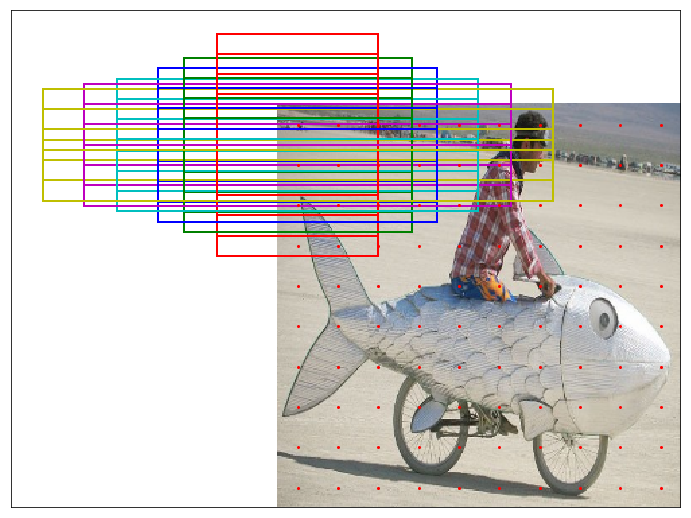

source_layer_name        conv6_2
map_size                 (10, 10)
aspect_ratios            [1, 2, 3, 5, 7, 10, 1, 2, 3, 5, 7, 10]
shift                    [(0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5)]
clip                     False
flip                     False
minmax_size              [120. 165.]
special_ssd_box          False
num_locations            100
num_boxes                1200
num_boxes_per_location   12



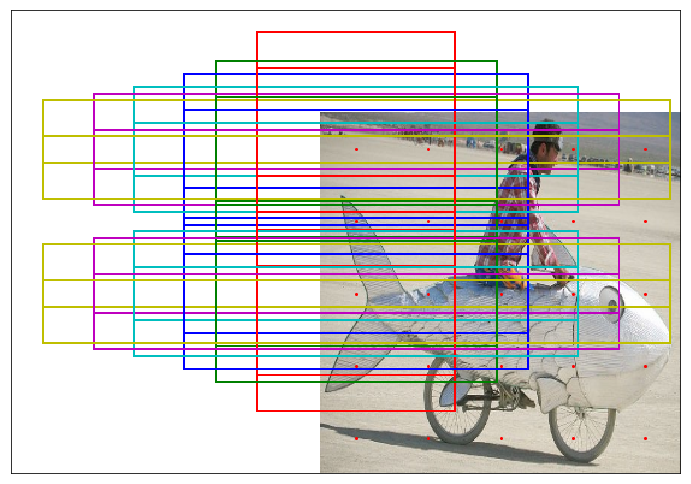

source_layer_name        conv7_2
map_size                 (5, 5)
aspect_ratios            [1, 2, 3, 5, 7, 10, 1, 2, 3, 5, 7, 10]
shift                    [(0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5)]
clip                     False
flip                     False
minmax_size              [165. 210.]
special_ssd_box          False
num_locations            25
num_boxes                300
num_boxes_per_location   12



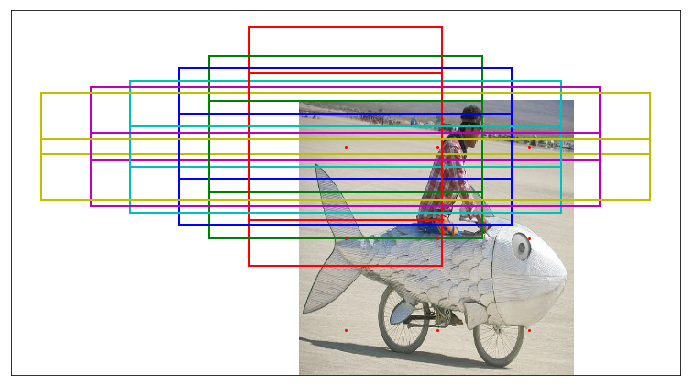

source_layer_name        conv8_2
map_size                 (3, 3)
aspect_ratios            [1, 2, 3, 5, 7, 10, 1, 2, 3, 5, 7, 10]
shift                    [(0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5)]
clip                     False
flip                     False
minmax_size              [210. 255.]
special_ssd_box          False
num_locations            9
num_boxes                108
num_boxes_per_location   12



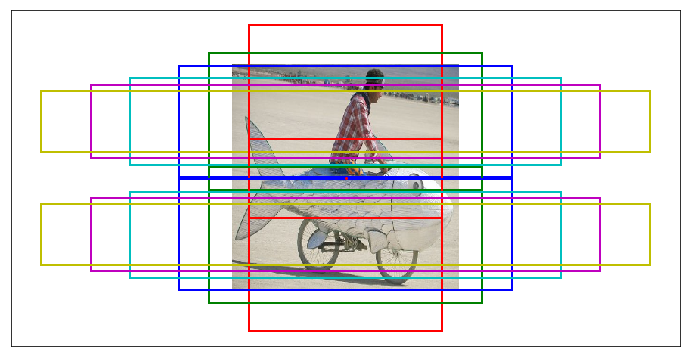

source_layer_name        conv9_2
map_size                 (1, 1)
aspect_ratios            [1, 2, 3, 5, 7, 10, 1, 2, 3, 5, 7, 10]
shift                    [(0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, -0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5), (0.0, 0.5)]
clip                     False
flip                     False
minmax_size              [255. 300.]
special_ssd_box          False
num_locations            1
num_boxes                12
num_boxes_per_location   12



In [4]:
img = cv2.imread('data/images/fish-bike.jpg')
#input_img = preprocess(img, model.image_size)

for m in prior_util.prior_maps:
    plt.figure(figsize=[12]*2)
    prior_util.show_image(img)
    m.plot_locations()
    m.plot_boxes([0, 10, 100])
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()
    print(m)

In [5]:
weights_path = 'checkpoints/201710141431_tb300_synthtext_horizontal10/weights.019.h5'
load_weights(model, weights_path)

In [6]:
from data_icdar2015fst import GTUtility
gt_util = GTUtility('data/ICDAR2015_FST/')

In [7]:
_, inputs, images, data = gt_util.sample_random_batch(batch_size=100, input_size=model.image_size)

preds = model.predict(inputs, batch_size=1, verbose=1)

100/100 [==============================] - 2s 21ms/step


In [8]:
from ssd_utils import non_maximum_suppression
from utils.vis import plot_box
    
def decode(self, model_output, confidence_threshold=0.01, keep_top_k=200, fast_nms=True, sparse=True, debug=False):
        # calculation is done with normalized sizes
        
        prior_mask = model_output[:,4:] > confidence_threshold
        
        if sparse:
            # compute boxes only if the confidence is high enough and the class is not background
            mask = np.any(prior_mask[:,1:], axis=1)
            prior_mask = prior_mask[mask]
            mask = np.ix_(mask)[0]
            model_output = model_output[mask]
            priors_xy = self.priors_xy[mask] / self.image_size
            priors_wh = self.priors_wh[mask] / self.image_size
            priors_variances = self.priors[mask,-4:]
        else:
            priors_xy = self.priors_xy / self.image_size
            priors_wh = self.priors_wh / self.image_size
            priors_variances = self.priors[:,-4:]
        #print('offsets', len(confidence), len(prior_mask))
        
        offsets = model_output[:,:4]
        confidence = model_output[:,4:]
        
        num_priors = offsets.shape[0]
        num_classes = confidence.shape[1]

        # compute bounding boxes from local offsets
        boxes = np.empty((num_priors, 4))
        offsets = offsets * priors_variances
        boxes_xy = priors_xy + offsets[:,0:2] * priors_wh
        boxes_wh = priors_wh * np.exp(offsets[:,2:4])
        boxes[:,0:2] = boxes_xy - boxes_wh / 2. # xmin, ymin
        boxes[:,2:4] = boxes_xy + boxes_wh / 2. # xmax, ymax
        boxes = np.clip(boxes, 0.0, 1.0)
        
        # do non maximum suppression
        results = []
        for c in range(1, num_classes):
            mask = prior_mask[:,c]
            boxes_to_process = boxes[mask]
            if len(boxes_to_process) > 0:
                confs_to_process = confidence[mask, c]
                
                # Tensorflow NMS
                #feed_dict = {
                #self.boxes: boxes_to_process,
                #    self.scores: confs_to_process
                #}
                #idx = self.sess.run(self.nms, feed_dict=feed_dict)
                
                if fast_nms:
                    idx = non_maximum_suppression(
                            boxes_to_process, confs_to_process, 
                            self.nms_thresh, self.nms_top_k)
                else:
                    idx = non_maximum_suppression_slow(
                            boxes_to_process, confs_to_process, 
                            self.nms_thresh, self.nms_top_k)
                
                good_boxes = boxes_to_process[idx]
                good_confs = confs_to_process[idx][:, None]
                labels = np.ones((len(idx),1)) * c
                c_pred = np.concatenate((good_boxes, good_confs, labels), axis=1)
                results.extend(c_pred)
                
                if debug:
                    ax = plt.gca()
                    
                    # prior centers
                    xy = priors_xy * self.image_size
                    plt.plot(xy[:,0], xy[:,1], 'r.', markersize=8)
                    
                    for i in range(len(boxes_to_process)):
                        # predictions
                        plot_box(boxes_to_process[i] * np.repeat(self.image_size, 2), box_format='xyxy', color='b')
                        
                        # priors boxes
                        xy = priors_xy[mask][i] * self.image_size
                        wh = priors_wh[mask][i] * self.image_size
                        xy11 = xy-wh/2
                        xy12 = xy+wh/2
                        ax.add_patch(plt.Rectangle(xy11, wh[0], wh[1],fill=False, edgecolor='r', linewidth=1))
                        
                        # connections
                        xy21 = boxes_to_process[i,0:2] * self.image_size
                        xy22 = boxes_to_process[i,2:4] * self.image_size
                        ax.plot([xy11[0],xy21[0]],[xy11[1],xy21[1]], 'c')
                        ax.plot([xy12[0],xy22[0]],[xy12[1],xy22[1]], 'c')
                        
        if len(results) > 0:
            results = np.array(results)
            order = np.argsort(-results[:, 4])
            results = results[order]
            results = results[:keep_top_k]
        else:
            results = np.empty((0,6))
        self.results = results
        return results

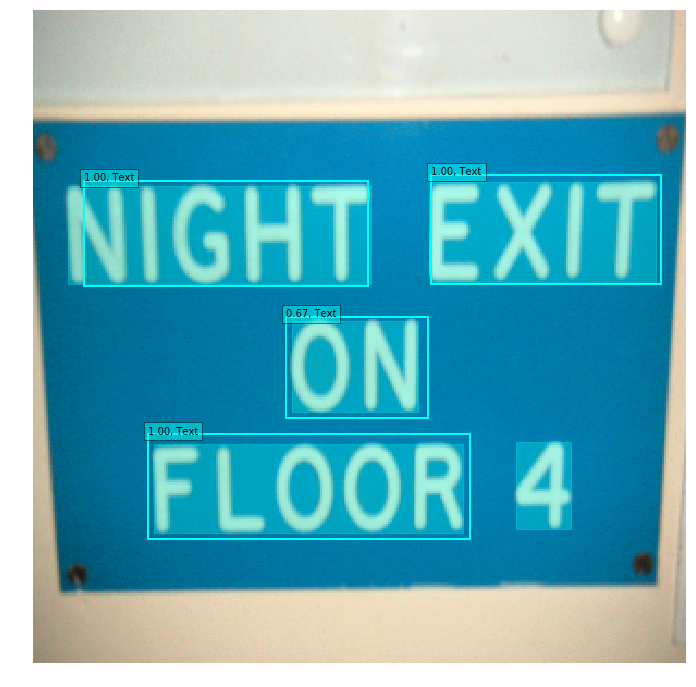

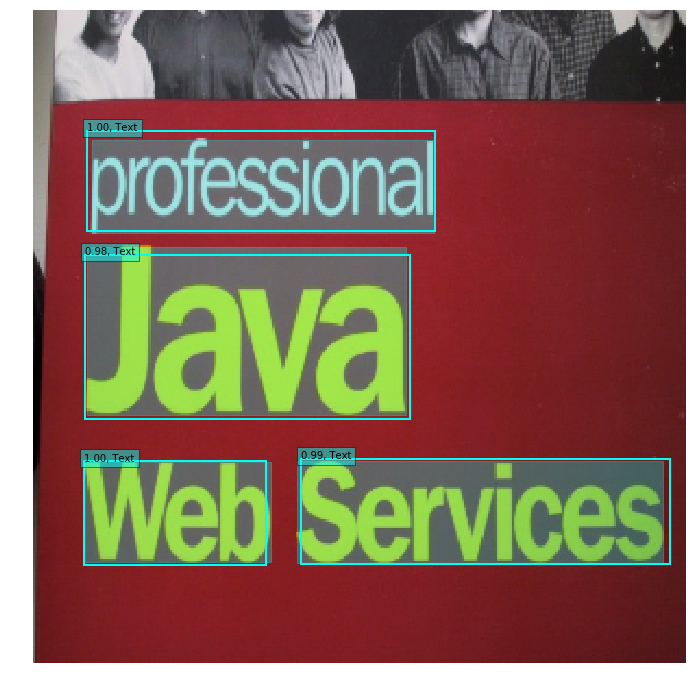

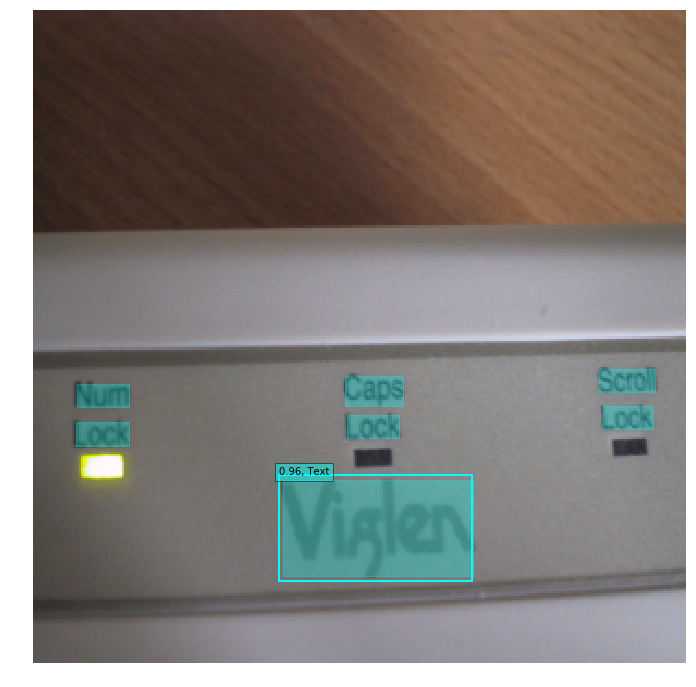

In [9]:
for i in range(3):
    if len(data[i]) > 0:
        plt.figure(figsize=[12]*2)
        plt.imshow(images[i])
        #res = prior_util.decode(preds[i], confidence_threshold=0.6, keep_top_k=100)
        res = decode(prior_util, preds[i], confidence_threshold=0.6, keep_top_k=100, debug=False)
        prior_util.plot_results(res, classes=gt_util.classes, show_labels=True, gt_data=data[i])
        plt.axis('off')
        plt.show()

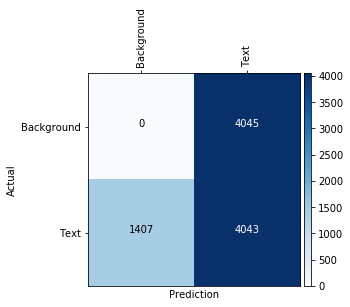

0.4258030542390732

In [10]:
from ssd_metric import confusion_matrix, plot_confusion_matrix, accuracy

encoded_gt = [prior_util.encode(d) for d in data]

y_true_all = []
y_pred_all = []

for i in range(len(data)):
    y_true = np.argmax(encoded_gt[i][:,4:], axis=1)
    y_pred = np.argmax(preds[i][:,4:], axis=1)
    #prior_object_idx = np.where(y_true)[0] # gt prior box contains object
    prior_object_idx = np.where(y_true+y_pred)[0] # gt or prediction prior box contains object
    y_true_all.extend(y_true[prior_object_idx])
    y_pred_all.extend(y_pred[prior_object_idx])
    
#y_pred_all = [ 17 for i in y_pred_all]
cm = confusion_matrix(y_true_all, y_pred_all, gt_util.num_classes)
plot_confusion_matrix(cm, gt_util.classes, figsize=[4]*2)
accuracy(y_true_all, y_pred_all)

### Compare versions of non-maximum suppression

In [11]:
thresh = 0.6
top_k = 100
results = [prior_util.decode(p, confidence_threshold=thresh, keep_top_k=top_k, fast_nms=False) for p in preds]
results_fast = [prior_util.decode(p, confidence_threshold=thresh, keep_top_k=top_k, fast_nms=True) for p in preds]

In [12]:
c = 0
for i in range(0, len(results)):
    r1 = results[i]
    r2 = results_fast[i]
    if not np.all(r1.shape == r2.shape):
        c += 1
        print(c, i, r1.shape, r2.shape)
        
        # slow
        plt.figure(figsize=[10]*2)
        plt.imshow(images[i])
        prior_util.plot_results(r1, classes=gt_util.classes, show_labels=True, gt_data=data[i])
        plt.show()
        
        # fast
        plt.figure(figsize=[10]*2)
        plt.imshow(images[i])
        prior_util.plot_results(r2, classes=gt_util.classes, show_labels=True, gt_data=data[i])
        plt.show()

In [13]:
thresh = 0.5
top_k = 400
results = [prior_util.decode(p, confidence_threshold=thresh, keep_top_k=top_k, fast_nms=False) for p in preds]
results_fast = [prior_util.decode(p, confidence_threshold=thresh, keep_top_k=top_k, fast_nms=True) for p in preds]

Class                     TP       FP       FN     AP
 1 Text                  264      415       89  0.675
Sum / mAP                264      415       89  0.675 @ 0.5 None


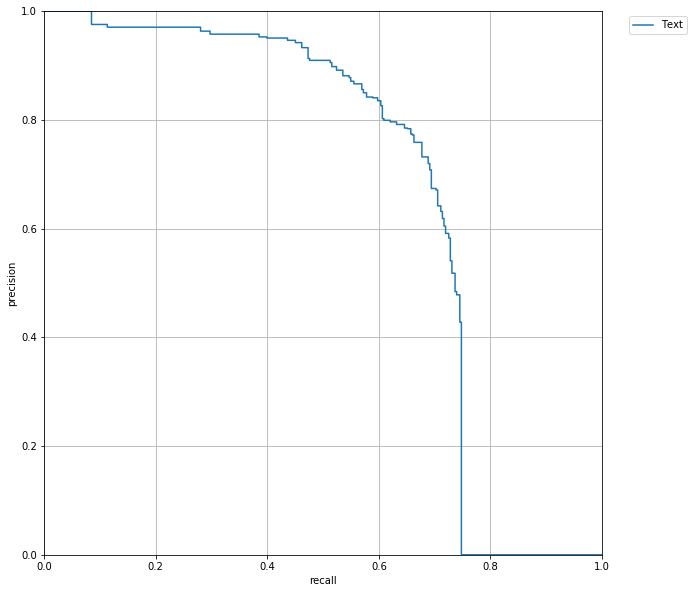

Class                     TP       FP       FN     AP
 1 Text                  264      415       89  0.675
Sum / mAP                264      415       89  0.675 @ 0.5 None


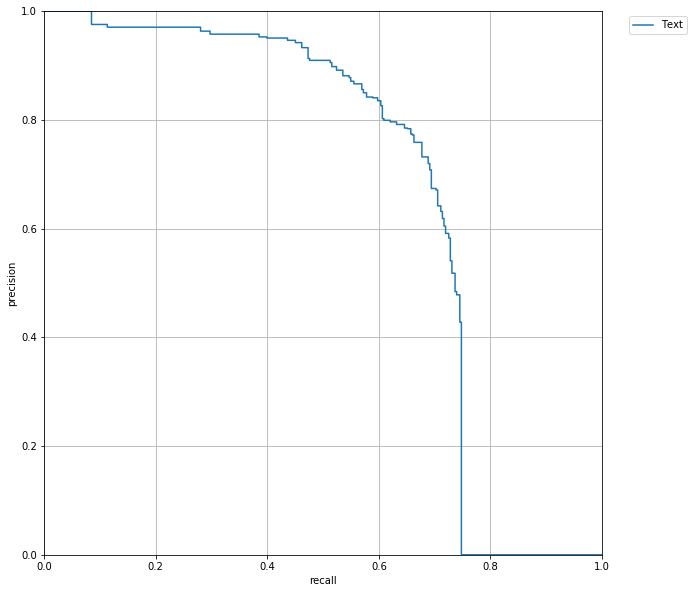

In [14]:
from ssd_metric import evaluate_results

evaluate_results(data, results, gt_util)
evaluate_results(data, results_fast, gt_util)

### Performance None-Maximum Suppression

In [15]:
%%timeit
for i in range(100):
    res = prior_util.decode(preds[i], confidence_threshold=0.6, keep_top_k=100, fast_nms=True, sparse=False)

177 ms ± 217 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%%timeit
for i in range(100):
    res = prior_util.decode(preds[i], confidence_threshold=0.6, keep_top_k=100, fast_nms=False, sparse=False)

253 ms ± 910 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
from cProfile import Profile

p = Profile()
p.enable()

for i in range(100):
    res = prior_util.decode(preds[i], confidence_threshold=0.6, keep_top_k=100, fast_nms=True)
    #res = prior_util.decode(preds[i], confidence_threshold=0.6, keep_top_k=100, fast_nms=False)

p.disable()
p.print_stats(sort='cumulative')

         5309 function calls in 0.035 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.035    0.017 interactiveshell.py:2817(run_code)
        2    0.000    0.000    0.035    0.017 {built-in method builtins.exec}
        1    0.000    0.000    0.035    0.035 <ipython-input-17-9f7f15001f6e>:6(<module>)
      100    0.024    0.000    0.035    0.000 ssd_utils.py:459(decode)
       99    0.005    0.000    0.006    0.000 ssd_utils.py:65(non_maximum_suppression)
      100    0.000    0.000    0.002    0.000 fromnumeric.py:1934(any)
      100    0.000    0.000    0.002    0.000 {method 'any' of 'numpy.ndarray' objects}
      100    0.000    0.000    0.002    0.000 _methods.py:37(_any)
      100    0.002    0.000    0.002    0.000 {method 'reduce' of 'numpy.ufunc' objects}
      100    0.000    0.000    0.001    0.000 index_tricks.py:26(ix_)
      298    0.000    0.000    0.001    0.000 fromnumeric

### Performance sparse decoding

In [18]:
%%timeit
for i in range(100):
    res = prior_util.decode(preds[i], confidence_threshold=0.6, keep_top_k=100, fast_nms=True, sparse=True)

32.4 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
%%timeit
for i in range(100):
    res = prior_util.decode(preds[i], confidence_threshold=0.6, keep_top_k=100, fast_nms=True, sparse=False)

177 ms ± 402 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Learnin rate decay

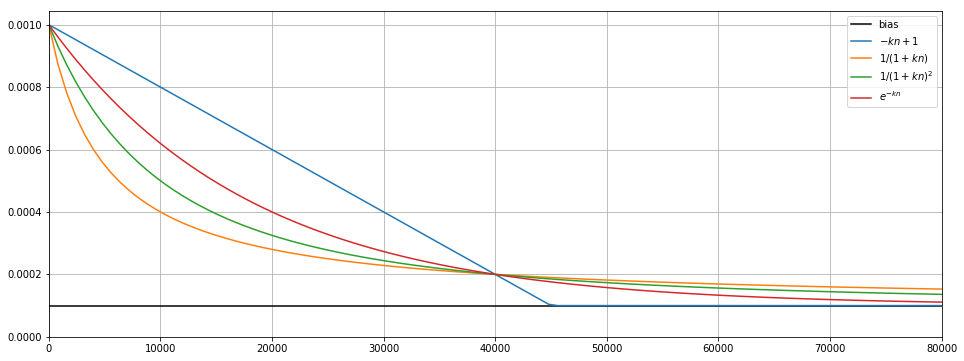

In [20]:
from utils.training import LearningRateDecay
lr_decay_cb = LearningRateDecay(methode='linear', base_lr=1e-3, n_desired=40000, desired=0.2, bias=0.5, minimum=0.0)
lr_decay_cb.plot_learning_rates()